<a href="https://colab.research.google.com/github/Yashmitha22/ML_projects/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Create the data points
data = {
    'Height':[170,165,180,175,166,172,168,177,162,158],
    'Weight':[65,59,75,68,55,70,62,74,58,54],
    'Age':[30,25,35,28,22,32,27,33,24,21],
    'Gender':[1,0,1,1,0,1,0,1,0,0] #female = 1 male=0
}
df = pd.DataFrame(data)
print(df)

   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     166      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


In [ ]:
#Standardization of data
X = df.drop('Gender', axis=1)
y = df['Gender']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train,y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

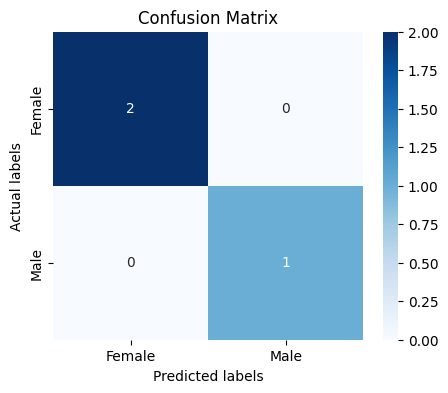

In [ ]:
#Evaluating using confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt = 'd', cmap='Blues',xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

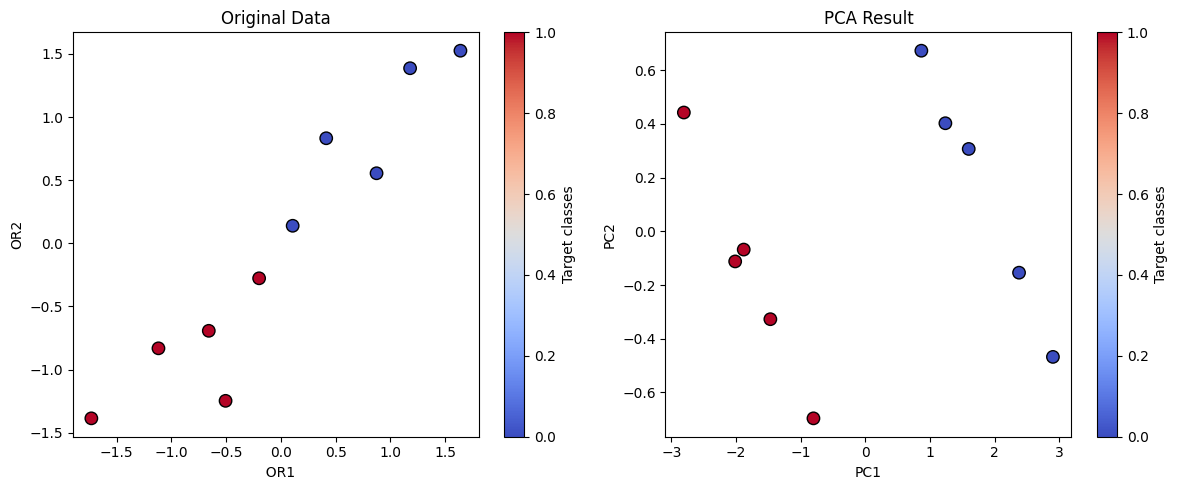

In [ ]:
#Visualize using PCA result
y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_numeric, cmap='coolwarm',edgecolor='k',s=80)
plt.xlabel('  OR1')
plt.ylabel('OR2')
plt.title('Original Data')
plt.colorbar(label='Target classes')

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_numeric, cmap='coolwarm',edgecolor='k',s=80)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Result')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()
